In [464]:
# import dependencies
%matplotlib inline 
import os

import math , time, random , datetime

#for manipulation
import numpy as np
import pandas as pd

# for visulation 
import matplotlib.pyplot as plt
!pip install missingno
import missingno
import seaborn as sns

#for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
 
# Machine Learning 
!pip install catboost
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# for warnings 
import warnings 
warnings.filterwarnings("ignore")



# Loading Dataset


In [466]:
train = pd.read_csv(r'C:\\Users\\Prabhat Singh\Desktop\dataset\titanic\train.csv')
test  = pd.read_csv(r'C:\\Users\\Prabhat Singh\Desktop\dataset\titanic\test.csv')
gender_submission = pd.read_csv(r'C:\\Users\\Prabhat Singh\Desktop\dataset\titanic\gender_submission.csv') #sample output

In [467]:
 train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [468]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [469]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Data Description

survival: Survival

pclass: Ticket class   

sex: Sex

Age: Age in years

sibsp: # of siblings / spouses aboard the Titanic

parch: # of parents / children aboard the Titanic   

ticket: Ticket number

fare: Passenger fare

cabin: Cabin number

embarked: Port of Embarkation    
    

In [470]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


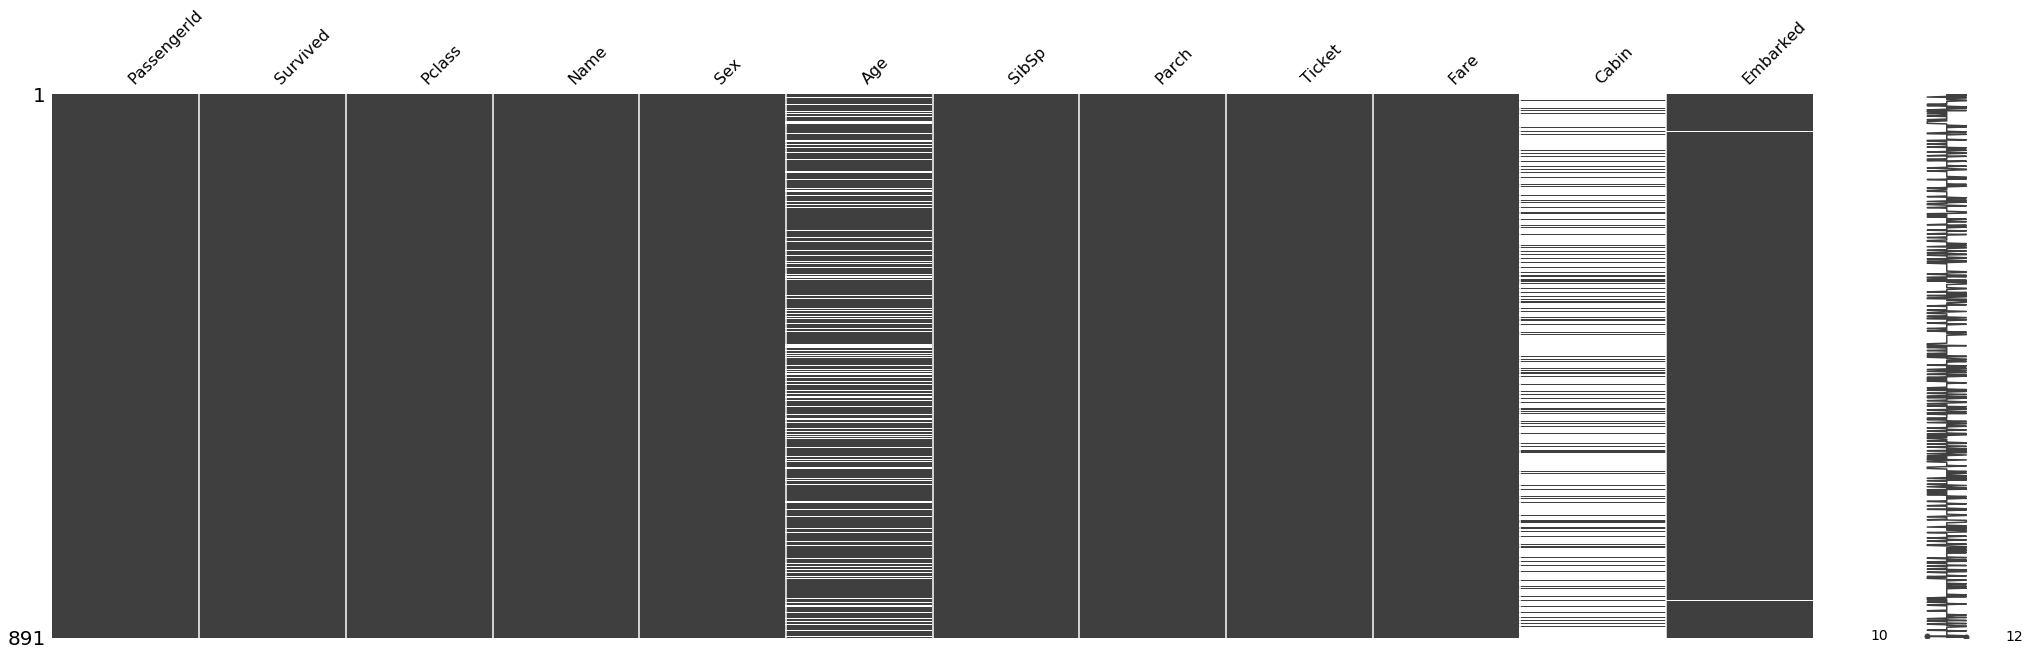

In [471]:
# misssing values
missingno.matrix(train,figsize=(35,10))

In [472]:
# Age and Cabin has the most number of missing values
# Embarked has only 2 missing values

In [473]:
def find_missing_values(df, columns):
    missing_vals= {}
    print("Number of missing or NaN values for each columns:")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length-total_column_values
        
    return missing_vals

missing_values = find_missing_values(train, columns=train.columns)
missing_values

        

        

Number of missing or NaN values for each columns:


{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

# To perform our data analysis,lets create two new dataframes
### we will create one for exploring discretised continous values ( continuous variables which have been sorted into some kind of category) and another for exploring continuous variales.

In [474]:
df_bin = pd.DataFrame() # for discretised continuous Variables
df_con = pd.DataFrame() # for continuous variables


In [475]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Target Feature Survived

0    549
1    342
Name: Survived, dtype: int64


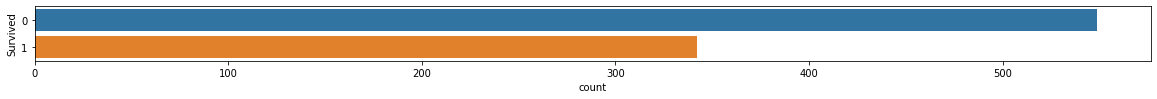

In [476]:
fig=plt.figure(figsize=(20,1))
sns.countplot(y="Survived",data=train);
print(train.Survived.value_counts())


In [477]:
df_bin["Survived"]= train["Survived"]

In [478]:
df_con["Survived"]= train["Survived"]

In [ ]:
df_bin.head()

In [ ]:
df_con.head()

In [ ]:
sns.distplot(train.Pclass)


In [ ]:
missing_values["Pclass"]

In [ ]:
# since Pclass does not have any missing values lets add it to sub dataframes
df_bin["Pclass"]=train["Pclass"]
df_con["Pclass"]= train["Pclass"]

In [ ]:
train.Name.value_counts()

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(train.Sex)

In [ ]:
df_bin["Sex"] = train["Sex"]
#df_bin.loc(df_bin)== female
df_bin["Sex"] = np.where(df_bin["Sex"]== 'female', 1, 0)
df_con["Sex"] = train['Sex']

In [ ]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df_bin.loc[df_bin["Survived"]== 1]["Sex"], kde_kws={"label": "Survived"});
sns.distplot(df_bin.loc[df_bin["Survived"]== 0]["Sex"], kde_kws={"label": "Did not Survived"});


In [ ]:
# more number of female survived

# Feature : Age

In [ ]:
missing_values["Age"]


In [ ]:
#over a quater of the age data is missing

### function to count and distribution visualisations

In [405]:
def plot_count_dist(data ,bin_df, label_column, target_column, figsize=(20,5), use_bin_df=False):
    if use_bin_df:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column,data= bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column]== 1][target_column],
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column]== 0][target_column],
                     kde_kws={"label": "Did not Survived"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column,data= data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column]== 1][target_column],
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column]== 0][target_column],
                     kde_kws={"label": "Did not Survived"});
      
        
        

# Feature : Sibsp

In [406]:
missing_values["SibSp"]

0

In [407]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [408]:
# adding to the subset
df_bin["SibSp"]=train["SibSp"]
df_con["SibSp"]=train["SibSp"]

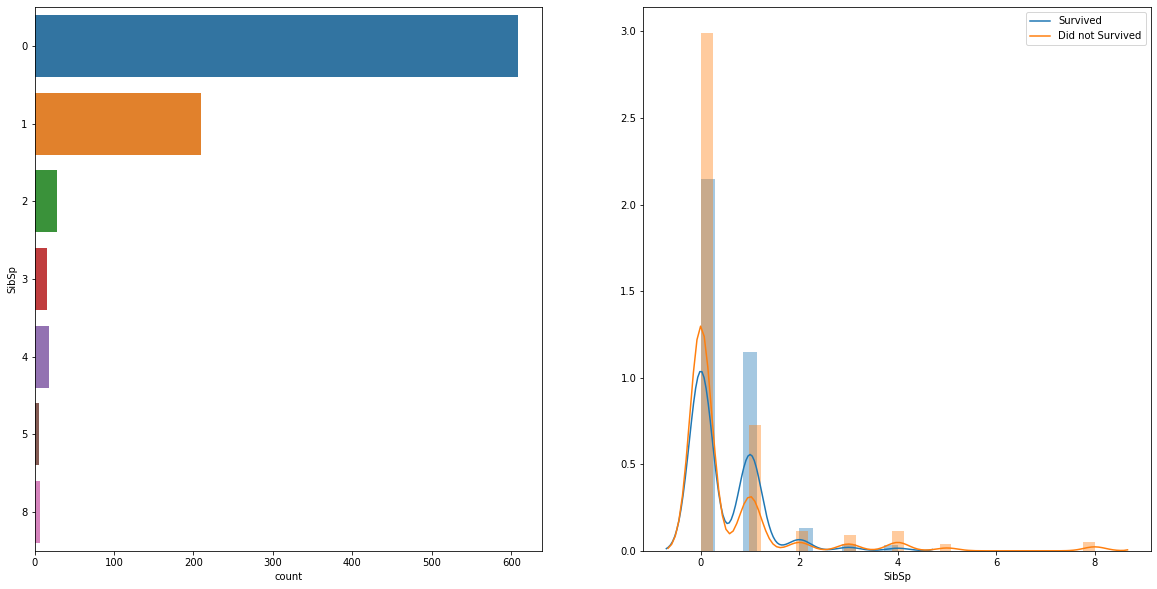

In [409]:
plot_count_dist(train, bin_df=df_bin,label_column="Survived",target_column= "SibSp",figsize=(20,10))

# Feature : Parch

In [410]:
missing_values["Parch"]

0

In [411]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [412]:
# adding to the subset
df_bin["Parch"]=train["Parch"]
df_con["Parch"]=train["Parch"]

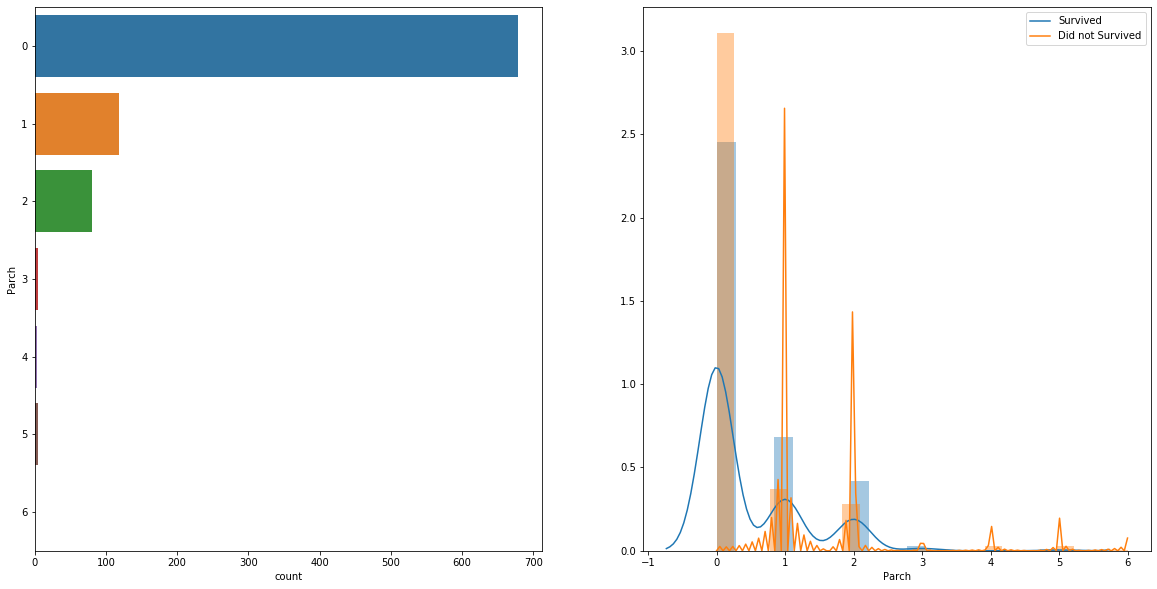

In [413]:
plot_count_dist(train, bin_df=df_bin,label_column="Survived",target_column= "Parch",figsize=(20,10))

# Feature :Ticket

In [414]:
missing_values["Ticket"]

0

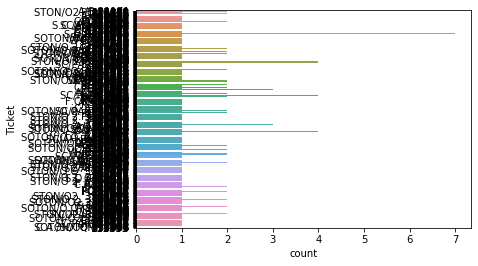

In [415]:
sns.countplot(y="Ticket",data=train)

In [416]:
train.Ticket.value_counts()

1601                 7
CA. 2343             7
347082               7
347088               6
3101295              6
CA 2144              6
S.O.C. 14879         5
382652               5
LINE                 4
17421                4
4133                 4
113760               4
2666                 4
347077               4
113781               4
PC 17757             4
19950                4
349909               4
W./C. 6608           4
PC 17572             3
13502                3
371110               3
345773               3
PC 17582             3
24160                3
C.A. 34651           3
SC/Paris 2123        3
239853               3
PC 17755             3
29106                3
                    ..
STON/O 2. 3101285    1
2677                 1
364850               1
347067               1
335677               1
16988                1
364848               1
SOTON/O2 3101272     1
A/4. 39886           1
STON/O 2. 3101286    1
347071               1
364500               1
111369     

In [417]:
#number of unique ticket
print("There are {} unique tickets values".format(len(train.Ticket.unique())))

There are 681 unique tickets values


# Feature : Fare

In [418]:
missing_values["Fare"]

0

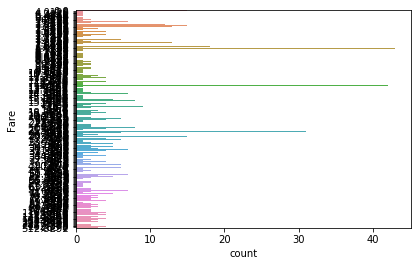

In [419]:
sns.countplot(y="Fare",data=train)

In [420]:
train.Fare.dtype

dtype('float64')

In [421]:
print("There are {} unique Fare values".format(len(train.Fare.unique())))

There are 248 unique Fare values


In [422]:
# adding to the subset
df_con["Fare"]=train["Fare"]
df_bin["Fare"]=pd.cut(train["Fare"],bins=5)

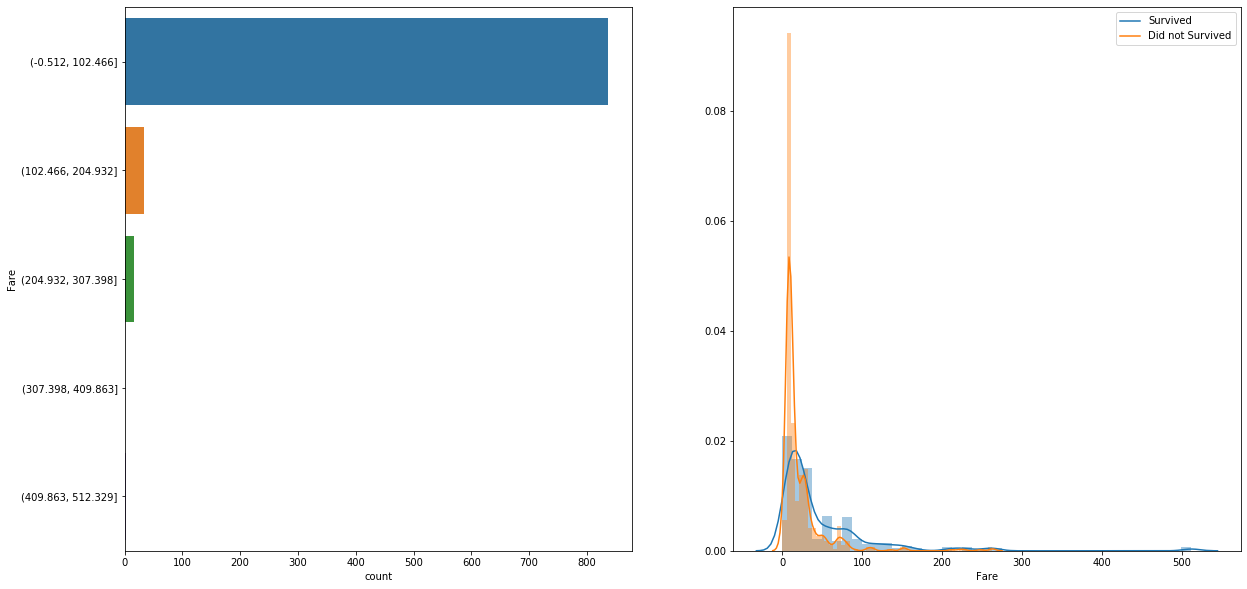

In [423]:
plot_count_dist(train, bin_df=df_bin,label_column="Survived",target_column= "Fare",figsize=(20,10),use_bin_df=True)

In [424]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


# Feature : Cabin

In [425]:
missing_values["Cabin"]

687

In [426]:
train.Cabin.value_counts()[0:20]

G6                 4
C23 C25 C27        4
B96 B98            4
F33                3
C22 C26            3
E101               3
F2                 3
D                  3
C125               2
F4                 2
E8                 2
D26                2
B18                2
D36                2
D20                2
C124               2
E33                2
B28                2
B22                2
B57 B59 B63 B66    2
Name: Cabin, dtype: int64

# Feature : Embarked
S = Southampton
Q = Queenstown
C = cherboug

In [427]:
missing_values["Embarked"]

2

In [428]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

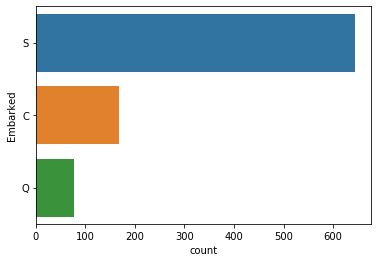

In [429]:
sns.countplot(y="Embarked",data=train)

In [430]:
# adding to the subset
df_bin["Embarked"]=train["Embarked"]
df_con["Embarked"]=train["Embarked"]

In [431]:
# Remove the 2 missing values
df_con =df_con.dropna(subset=["Embarked"])
df_bin =df_bin.dropna(subset=["Embarked"])
print(len(df_con))

889


In [432]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


In [433]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


# Feature Encoding

In [434]:
one_hot_cols=df_bin.columns.tolist()
one_hot_cols.remove("Survived")
df_bin_enc=pd.get_dummies(df_bin, columns=one_hot_cols)
df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [435]:
df_con_enc=df_con.apply(LabelEncoder().fit_transform)
df_con_enc.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,2,1,1,0,18,2
1,1,0,0,1,0,207,0
2,1,2,0,0,0,41,2
3,1,0,0,1,0,189,2
4,0,2,1,0,0,43,2


# Machine Learning 

In [436]:
selected_df= df_con_enc
x_train= selected_df.drop("Survived",axis=1)
y_train = selected_df.Survived

In [437]:
def fit_ml_algo(algo, x_train, y_train, cv):
    
    # One Pass
    model = algo.fit(x_train, y_train)
    acc = round(model.score(x_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  x_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

### Logistic Regression

In [438]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               x_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.08
Accuracy CV 10-Fold: 78.52
Running Time: 0:00:31.491673


### K-Nearest Neighbours

In [439]:

# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  x_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 81.44
Accuracy CV 10-Fold: 73.68
Running Time: 0:00:00.811607


### Gaussian Naive Bayes

In [440]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      x_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 76.72
Accuracy CV 10-Fold: 76.38
Running Time: 0:00:00.133198


### Linear Support Vector Machines (SVC)

In [441]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                x_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 75.25
Accuracy CV 10-Fold: 71.77
Running Time: 0:00:00.468007


### Stochastic Gradient Descent

In [442]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  x_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 64.57
Accuracy CV 10-Fold: 63.55
Running Time: 0:00:00.128210


### Decision Tree Classifier

In [443]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                x_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 79.64
Running Time: 0:00:00.399374


### Gradient Boost Trees

In [444]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       x_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.39
Accuracy CV 10-Fold: 81.1
Running Time: 0:00:00.915342


### Catboost Algorithm

In [445]:
x_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,2,1,1,0,18,2
1,0,0,1,0,207,0
2,2,0,0,0,41,2
3,0,0,1,0,189,2
4,2,1,0,0,43,2


In [446]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [447]:
#categorical feature for catboost algorithm
cat_features= np.where(x_train.dtypes !=np.float)[0]
cat_features

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [448]:
train_pool = Pool(x_train, y_train,cat_features)

In [449]:
catboost_model= CatBoostClassifier(iterations=1000, custom_loss=["Accuracy"], loss_function="Logloss")

In [450]:
catboost_model.fit(train_pool,plot=True)

Learning rate set to 0.009797
0:	learn: 0.6873671	total: 39.6ms	remaining: 39.6s
1:	learn: 0.6815315	total: 73.1ms	remaining: 36.5s
2:	learn: 0.6759677	total: 112ms	remaining: 37.2s
3:	learn: 0.6708741	total: 125ms	remaining: 31.1s
4:	learn: 0.6660886	total: 141ms	remaining: 28s
5:	learn: 0.6611789	total: 144ms	remaining: 23.8s
6:	learn: 0.6565057	total: 167ms	remaining: 23.7s
7:	learn: 0.6518591	total: 180ms	remaining: 22.3s
8:	learn: 0.6469597	total: 198ms	remaining: 21.8s
9:	learn: 0.6427030	total: 207ms	remaining: 20.5s
10:	learn: 0.6381866	total: 226ms	remaining: 20.3s
11:	learn: 0.6333918	total: 246ms	remaining: 20.3s
12:	learn: 0.6284292	total: 316ms	remaining: 24s
13:	learn: 0.6240399	total: 372ms	remaining: 26.2s
14:	learn: 0.6195645	total: 391ms	remaining: 25.7s
15:	learn: 0.6154322	total: 422ms	remaining: 26s
16:	learn: 0.6115694	total: 428ms	remaining: 24.8s
17:	learn: 0.6072843	total: 449ms	remaining: 24.5s
18:	learn: 0.6032405	total: 471ms	remaining: 24.3s
19:	learn: 0.59

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

73:	learn: 0.4857233	total: 924ms	remaining: 11.6s
74:	learn: 0.4843611	total: 937ms	remaining: 11.6s
75:	learn: 0.4829877	total: 957ms	remaining: 11.6s
76:	learn: 0.4814649	total: 980ms	remaining: 11.7s
77:	learn: 0.4802163	total: 1s	remaining: 11.9s
78:	learn: 0.4788505	total: 1.01s	remaining: 11.8s
79:	learn: 0.4774594	total: 1.02s	remaining: 11.7s
80:	learn: 0.4762993	total: 1.03s	remaining: 11.7s
81:	learn: 0.4752030	total: 1.03s	remaining: 11.6s
82:	learn: 0.4745851	total: 1.04s	remaining: 11.5s
83:	learn: 0.4734463	total: 1.04s	remaining: 11.4s
84:	learn: 0.4721807	total: 1.05s	remaining: 11.3s
85:	learn: 0.4711286	total: 1.06s	remaining: 11.3s
86:	learn: 0.4706536	total: 1.06s	remaining: 11.2s
87:	learn: 0.4696451	total: 1.08s	remaining: 11.2s
88:	learn: 0.4691907	total: 1.08s	remaining: 11.1s
89:	learn: 0.4682152	total: 1.08s	remaining: 11s
90:	learn: 0.4672627	total: 1.09s	remaining: 10.9s
91:	learn: 0.4661696	total: 1.09s	remaining: 10.8s
92:	learn: 0.4651866	total: 1.1s	rem

In [451]:
acc_catboost = round(catboost_model.score(x_train,y_train)*100,2)

In [452]:
#perform catboost cross-validation
start_time = time.time()
cv_params = catboost_model.get_params()
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)
catboost_time = (time.time() - start_time)
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6767627	test: 0.6766954	best: 0.6766954 (0)	total: 3.59s	remaining: 59m 50s
1:	learn: 0.6602797	test: 0.6611644	best: 0.6611644 (1)	total: 7.09s	remaining: 58m 57s
2:	learn: 0.6461426	test: 0.6473387	best: 0.6473387 (2)	total: 10.3s	remaining: 56m 58s
3:	learn: 0.6322198	test: 0.6333777	best: 0.6333777 (3)	total: 13.3s	remaining: 55m 8s
4:	learn: 0.6187652	test: 0.6204735	best: 0.6204735 (4)	total: 16.3s	remaining: 54m 3s
5:	learn: 0.6057490	test: 0.6080836	best: 0.6080836 (5)	total: 19.7s	remaining: 54m 31s
6:	learn: 0.5939918	test: 0.5971687	best: 0.5971687 (6)	total: 23.1s	remaining: 54m 35s
7:	learn: 0.5844453	test: 0.5876274	best: 0.5876274 (7)	total: 26.1s	remaining: 53m 50s
8:	learn: 0.5746543	test: 0.5782084	best: 0.5782084 (8)	total: 29s	remaining: 53m 16s
9:	learn: 0.5651383	test: 0.5689412	best: 0.5689412 (9)	total: 32.2s	remaining: 53m 3s
10:	learn: 0.5558030	test: 0.5600828	best: 0.5600828 (10)	total: 35.5s	remaining: 53m 9s
11:	learn: 0.5473244	test: 0.5525076

In [453]:
# Catboost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 87.96
Accuracy cross-validation 10-Fold: 81.66
Running Time: 2:31:05.481586


### Model Results

In [454]:
# regular accuracy score
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,92.46
7,CatBoost,87.96
6,Gradient Boosting Trees,86.39
0,KNN,81.44
1,Logistic Regression,79.08
2,Naive Bayes,76.72
4,Linear SVC,75.25
3,Stochastic Gradient Decent,64.57


In [455]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
7,CatBoost,81.66
6,Gradient Boosting Trees,81.10
5,Decision Tree,79.64
1,Logistic Regression,78.52
2,Naive Bayes,76.38
0,KNN,73.68
4,Linear SVC,71.77
3,Stochastic Gradient Decent,63.55


In [456]:
# we can see that the catboost perform the best

### Feature Importance

In [457]:
def feature_importance(model, data):
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png')

,imp,col
2,10.236370,SibSp
5,12.945052,Embarked
3,14.100450,Parch
4,16.347941,Fare
0,22.414324,Pclass
1,23.955863,Sex


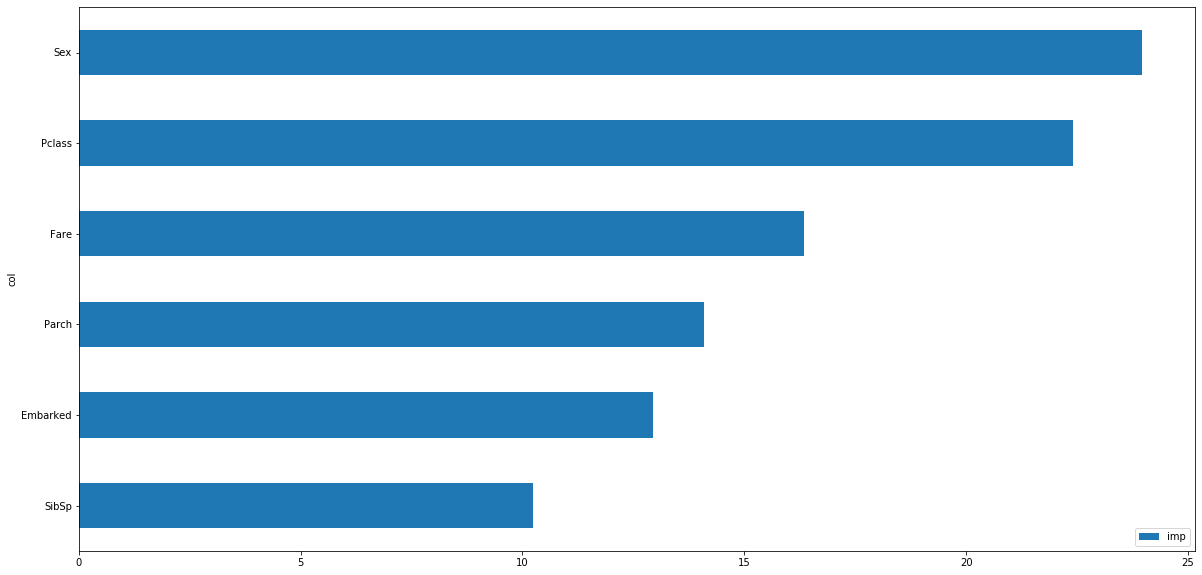

In [458]:
feature_importance(catboost_model, x_train)


### Precision and Recall

In [459]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.8901395224317061
Recall: 0.7154411764705881
F1: 0.7929986111045323
AUC: 0.9126474284795886


#### recall is low, this means there are higher amount of false negative value( predicted did not survive ut actually survive)

#### precision is higher therefore there is less false positive(predicted survived,when they did not)

## submission

In [460]:
# We need our test dataframe to look like this one
x_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,2,1,1,0,18,2
1,0,0,1,0,207,0
2,2,0,0,0,41,2
3,0,0,1,0,189,2
4,2,1,0,0,43,2


In [461]:
# Our test dataframe has some columns our model hasn't been trained on
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


In [384]:

# One hot encode the columns in the test data frame (like X_train)
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')

In [385]:

# Combine the test one hot encoded columns with test
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)

In [386]:
# Let's look at test, it should have one hot encoded columns now
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


In [388]:
# Create a list of columns to be used for the predictions
wanted_test_columns = x_train.columns
wanted_test_columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [391]:
# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive)
predictions[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1],
      dtype=int64)

In [392]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [393]:
# What does our submission have to look like?
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [394]:
# Let's convert our submission dataframe 'Survived' column to ints
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [395]:
# How does our submission dataframe look?
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [396]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [402]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('C:\\Users\\Prabhat Singh\Desktop\dataset\Titanic_improved.py', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!
